In [13]:
# Various methods for plotting in Julia
# Packages used: "Plots", "Gadfly"
# http://docs.juliaplots.org/latest/

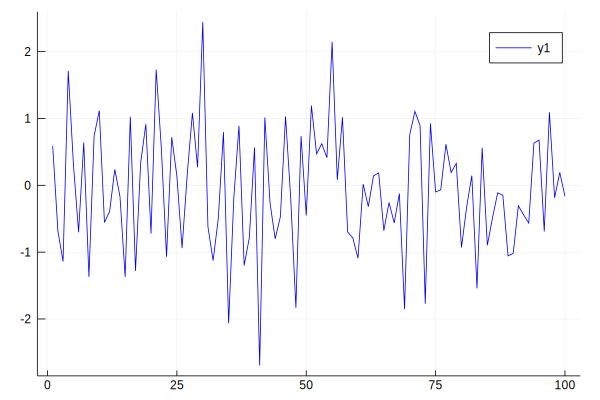

In [14]:
using Plots
ts_length = 100
ϵ_values = randn(ts_length)
Plots.plot(ϵ_values, color="blue")

In [15]:
### Using sample data for Luxembourg
# A4102 Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
# Titre : Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
# Source : STATEC
# Catégorie : Territoire et environnement - Energie
# Mots-clés : énergie
using CSV
#data = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/a4102.csv", datarow = 2, delim = ',')
data = CSV.read("data/a4102.csv", datarow = 2, delim = ',')

,Specification,Importations (sans pompage),Exportations,Production hydroelectrique (sans pompage),Production eolienne,Production thermique,Production par cogeneration classique,Production par biomethanisation
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Janvier 2008,515403907,268905073,15882142,8901314,239481115,39839031,3477378
2,Fevrier 2008,492908231,242287220,13229723,5632166,216082894,37509067,3105901
3,Mars 2008,511478062,258561148,17904608,8243949,234582495,37060627,3596567
4,Avril 2008,505912438,185736808,15224301,3152205,151696293,34251384,3639754
5,Mai 2008,539487831,76449762,6369060,2906031,2629120,24356917,3244814
6,Juin 2008,515001599,70568448,7452604,2685345,2900040,22806003,3401130
7,Juillet 2008,533531770,102476212,3751408,3495689,39779381,22123174,3418832
8,Aout 2008,424940320,261607531,3507759,5698748,237770055,20837868,3393362
9,Septembre 2008,441011960,247681401,5638506,4922609,237958665,26713702,3122010


In [16]:
# Working with dates: https://en.wikibooks.org/wiki/Introducing_Julia/Working_with_dates_and_times
using Dates
dr = Dates.Date(2008,1):Dates.Month(1):Dates.Date(2019,12)
size(dr)

(144,)

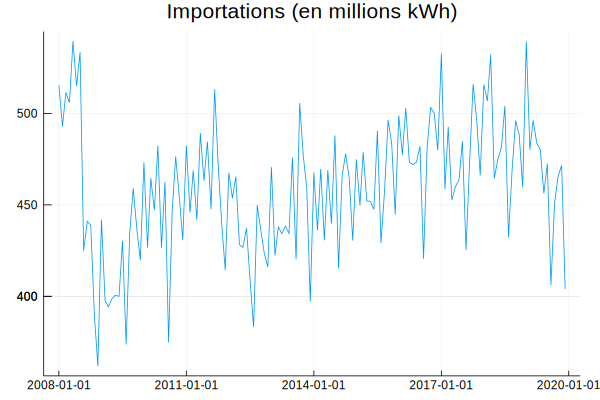

In [18]:
using Plots
Plots.plot( dr, data[2]./1000000, title="Importations (en millions kWh)", label = "" )

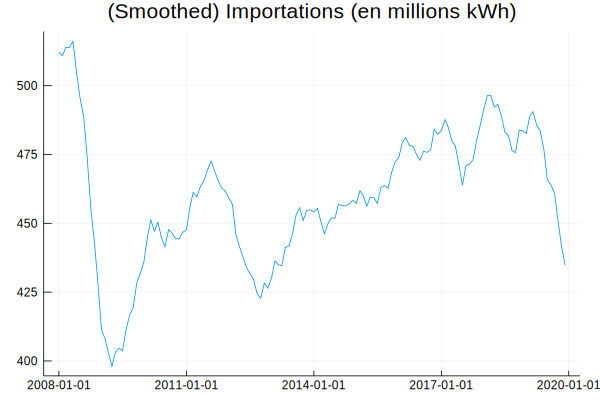

In [20]:
using ImageFiltering, OffsetArrays

kernel = OffsetArray(fill(1/8, 8), -5:2)  # moving average of 5 previous, current, and 2 ahead

iT = 144 # adapt to length of series
#v = zeros(20); v[10] = 1
v = data[1:iT,2]./1000000
[v imfilter(v, kernel)]

Plots.plot( dr, imfilter(v, kernel), title="(Smoothed) Importations (en millions kWh)", label = "" )

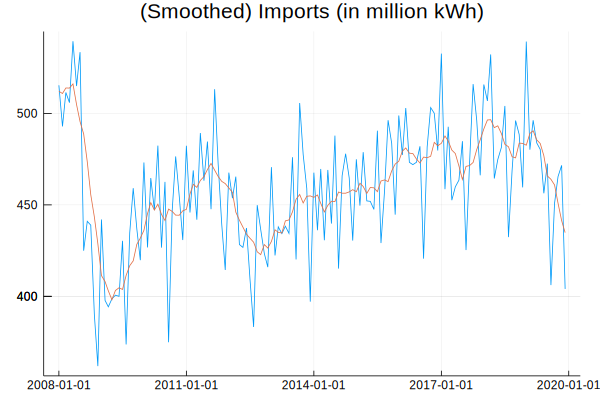

In [21]:
Plots.plot(dr, [data[2]./1000000 imfilter(v, kernel)], title="(Smoothed) Imports (in million kWh)", label="")

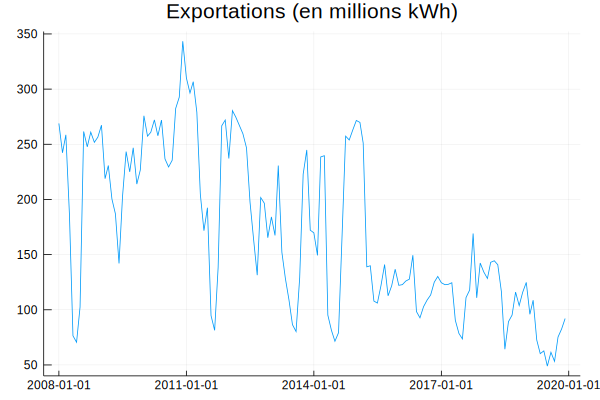

In [22]:
p2 = Plots.plot( dr, data[3]./1000000, title="Exportations (en millions kWh)", label = "" )

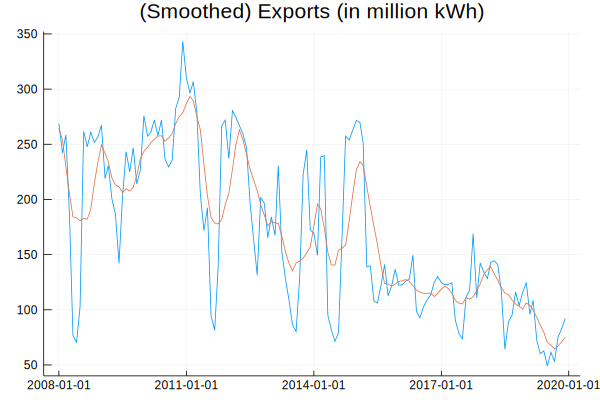

In [23]:
using ImageFiltering, OffsetArrays

kernel = OffsetArray(fill(1/8, 8), -5:2)  # moving average of 5 previous, current, and 2 ahead

iT = 144 # adapt to length of series
#v = zeros(20); v[10] = 1
v_export = data[1:iT,3]./1000000
[v_export imfilter(v_export, kernel)]

Plots.plot( dr, [v_export imfilter(v_export, kernel)], title="(Smoothed) Exports (in million kWh)", label = "" )

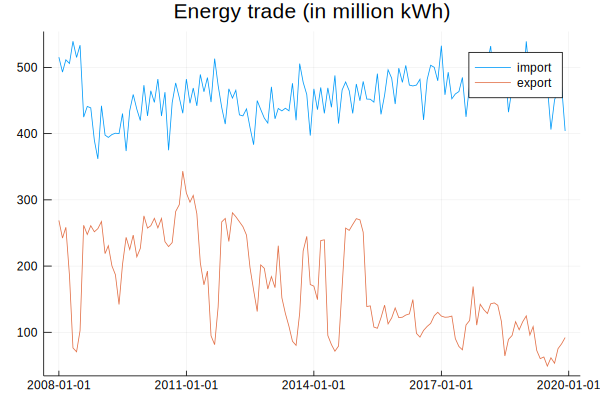

In [24]:
p12 = Plots.plot( dr, [ data[2] data[3] ]./1000000, title="Energy trade (in million kWh)", label=["import" "export"] )

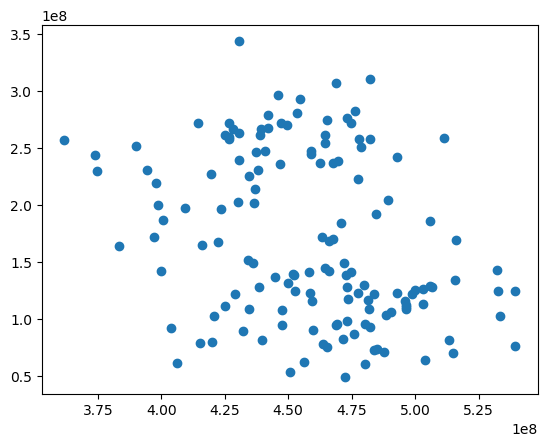

PyObject <matplotlib.collections.PathCollection object at 0x13a3e3400>

In [31]:
using PyPlot
nrows, ncols = size(data)
PyPlot.scatter(data[2:nrows,2], data[2:nrows,3])

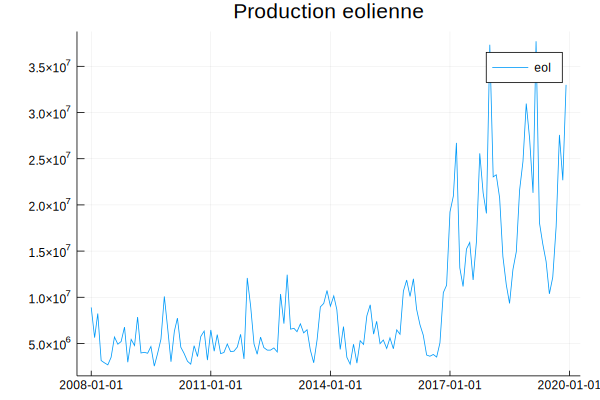

In [30]:
p3 = Plots.plot( dr, data[5], title="Production eolienne", label = "eol" )

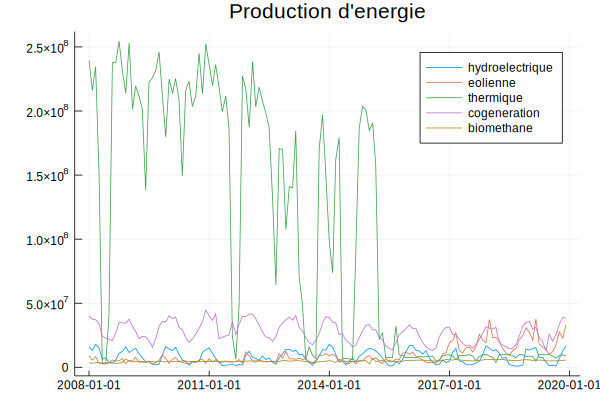

In [33]:
# Approvisionnement mensuel en électricité (en kWh) 2008 - 2018
p4 = Plots.plot( dr, [ data[4] data[5] data[6] data[7] data[8] ], title="Production d'energie", label=["hydroelectrique" "eolienne" "thermique" "cogeneration" "biomethane"] )

In [34]:
using CSV
data_pressure = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/a2105.csv", datarow = 2, delim = ',')

,Année,Mois,Pression
,Int64⍰,String⍰,Float64⍰
1,1961,Janvier,731.5
2,missing,Février,736.7
3,missing,Mars,739.2
4,missing,Avril,729.1
5,missing,Mai,732.5
6,missing,Juin,733.7
7,missing,Juillet,733.3
8,missing,Août,734.8
9,missing,Septembre,733.9


In [35]:
using Dates
dr_pressure = Dates.Date(1961,1):Dates.Month(1):Dates.Date(2019,12)

1961-01-01:1 month:2019-12-01

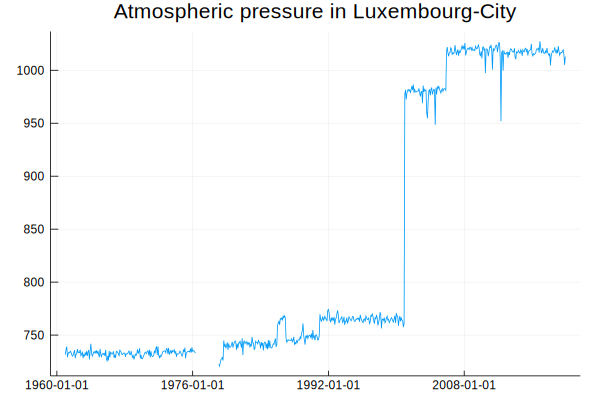

In [36]:
# Avant 2006, Unité: mm. À partir de 2006, Unité: millibar.
#
# La moyenne séculaire de la pression atmosphérique observée à Luxembourg-Ville réduite à 0 degré centigrade, est de 733.5 mm. En considérant que les lectures ont été faites à la température moyenne, la valeur précitée, ramenée au niveau de la mer, s'élève à 733.5 + 29.0 = 762.5 mm ou 1 016.6 millibar.
#
# Selon les moyennes disponibles la moyenne journalière est calculée:
# ­ par un appareil enregistreur
# ­ en divisant par 24 la somme des observations faites heure par heure
# ­ en divisant par 3 la somme des observations faites à 07.00, 13.00 et 21.00 heures.
# La moyenne du mois est obtenue par addition des moyennes de tous les jours et division par le nombre de jours du mois etc. (voir LAHR, Bulletin du STATEC 1966, No 7).
#
p5 = Plots.plot( dr_pressure, data_pressure[3] , title="Atmospheric pressure in Luxembourg-City", label="" )

In [37]:
# C4301 Interventions des ambulances de la Protection Civile 1962 - 2016
# Administration des services de secours
using CSV
data_accidents = CSV.read("data/c4301.csv", datarow = 2, delim = ',')

,Sp+AOk-cification,Interventions,+AKAAoACg-Accidents de la circulation,+AKAAoACg-Autres accidents,+AKAAoACg-Transports de malades,+AKAAoACg-Autres interventions,+ACI-+AKAAoACg-Exercices,entretien et divers+ACI-,Kilom+AOg-tres parcourus
,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Missing
1,1962,303,24,48,89,89,53,10981,missing
2,1965,1512,103,210,777,266,156,49981,missing
3,1970,4018,342,695,2312,421,248,111796,missing
4,1980,13318,1105,2056,8868,811,478,517163,missing
5,1985,19470,1119,2369,14553,917,512,683074,missing
6,1986,20693,1181,2502,15568,922,520,735771,missing
7,1987,20960,1005,2715,15576,1143,521,757818,missing
8,1988,21110,1157,2717,15615,1111,510,759263,missing
9,1989,22881,1186,2754,17080,1287,574,864214,missing


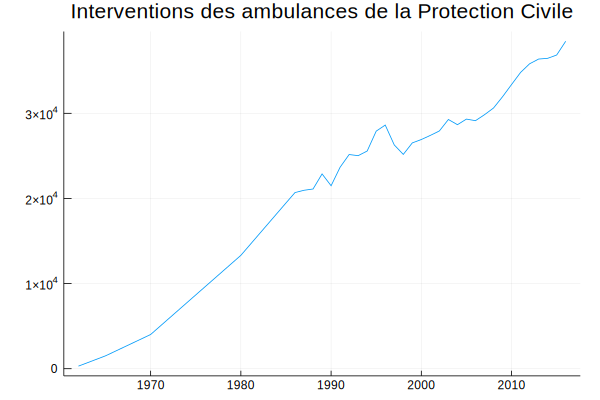

In [38]:
Plots.plot(data_accidents[1], data_accidents[2], title = "Interventions des ambulances de la Protection Civile", label = "")

In [39]:
# C6300 Élèves dans l'enseignement postprimaire 1991/1992 - 2016/2017
# MENJE - Service des Statistiques et Analyses
# OBSOLETE!
using CSV
data_education = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/c6300.csv", datarow = 2, delim = ',')

,Specification,Enseignement postprimaire au total,Enseignement public,+AKAAoACg-Masculin,+AKAAoACg-F+AOk-minin,Enseignement priv+AOk-,+AKAAoACg-Masculin_1,+AKAAoACg-F+AOk-minin_1
,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,1991/1992,20817,18682,10039,8643,2135,493,1642
2,1992/1993,21989,19472,10422,9050,2517,554,1963
3,1993/1994,23138,20635,11030,9605,2503,572,1931
4,1994/1995,25607,22822,12441,10381,2785,591,2194
5,1995/1996,27482,24500,13184,11316,2982,623,2359
6,1996/1997,28483,25386,13626,11760,3097,615,2482
7,1997/1998,29592,26429,14129,12300,3163,675,2488
8,1998/1999,30234,26796,14338,12458,3438,790,2648
9,1999/2000,30603,27070,14427,12643,3533,829,2704


In [41]:
# OBSOLETE!
# Sandbox
#typeof(data_education)
names(data_education)
#data_educ = colnames(data_education,["AnneeScolaire","PostPrimTot","EnsPublTot","EnsPublMasc","EnsPublFem","EnsPrivTot","EnsPrivMasc","EnsPrivFem"] )

8-element Array{Symbol,1}:
 :Specification                              
 Symbol("Enseignement postprimaire au total")
 Symbol("Enseignement public")               
 Symbol("+AKAAoACg-Masculin")                
 Symbol("+AKAAoACg-F+AOk-minin")             
 Symbol("Enseignement priv+AOk-")            
 Symbol("+AKAAoACg-Masculin_1")              
 Symbol("+AKAAoACg-F+AOk-minin_1")           

In [44]:
# OBSOLETE !
using DataFrames, RDatasets, CSV, StatsBase
describe(data_education)

┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = get_stats(::Array{Union{Missing, String},1}) at abstractdataframe.jl:484
└ @ DataFrames /Users/tarikz/.julia/packages/DataFrames/1PqZ3/src/abstractdataframe/abstractdataframe.jl:484
┌ Warning: `T` is deprecated, use `nonmissingtype` instead.
│   caller = get_stats(::Array{Union{Missing, Int64},1}) at abstractdataframe.jl:484
└ @ DataFrames /Users/tarikz/.julia/packages/DataFrames/1PqZ3/src/abstractdataframe/abstractdataframe.jl:484


,variable,mean,min,median,max,nunique,nmissing,eltype
,Symbol,Union…,Any,Union…,Any,Union…,Int64,DataType
1,Specification,,1991/1992,,2016/2017,26,0,String
2,Enseignement postprimaire au total,32875.7,20817,32775.5,39983,,0,Int64
3,Enseignement public,29450.2,18682,29088.0,36312,,0,Int64
4,+AKAAoACg-Masculin,15802.2,10039,15473.5,19516,,0,Int64
5,+AKAAoACg-F+AOk-minin,13648.0,8643,13614.5,16842,,0,Int64
6,Enseignement priv+AOk-,3425.58,2135,3667.0,3791,,0,Int64
7,+AKAAoACg-Masculin_1,678.038,493,646.5,829,,0,Int64
8,+AKAAoACg-F+AOk-minin_1,2747.54,1642,2885.0,3184,,0,Int64


In [43]:
# OBSOLETE !
using Dates
dr_education = Dates.Date(1991):Dates.Year(1):Dates.Date(2016)

1991-01-01:1 year:2016-01-01

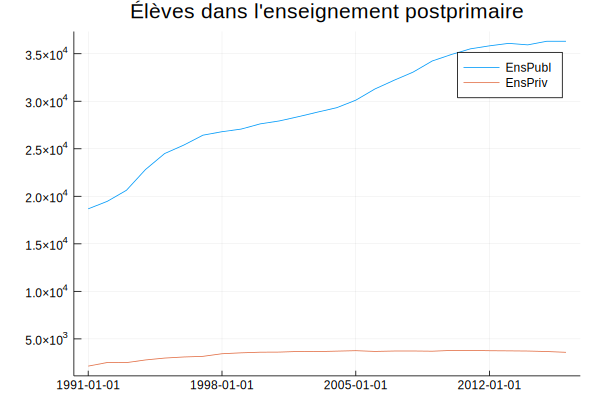

In [45]:
# OBSOLETE !
Plots.plot(dr_education, [data_education[3] data_education[6]], title = "Élèves dans l'enseignement postprimaire", label = ["EnsPubl" "EnsPriv"])

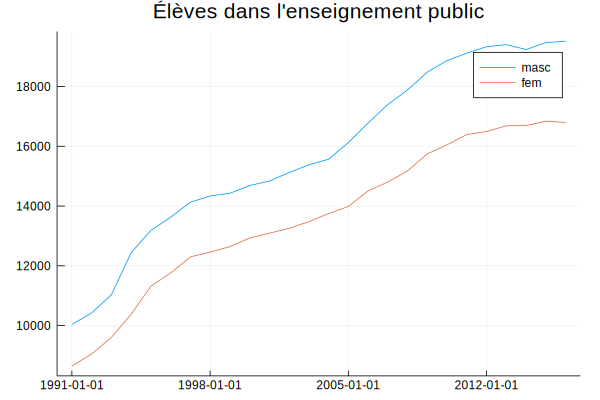

In [46]:
# OBSOLETE !
Plots.plot(dr_education, [data_education[4] data_education[5]], title = "Élèves dans l'enseignement public", label = ["masc" "fem"])

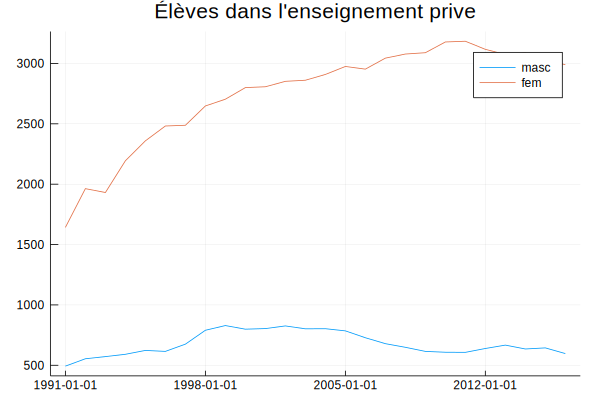

In [47]:
# OBSOLETE !
Plots.plot(dr_education, [data_education[7] data_education[8]], title = "Élèves dans l'enseignement prive", label = ["masc" "fem"])

In [48]:
# OBSOLETE !
# X046 Écoles et classes de l'enseignement fondamental par commune 2010/2011 - 2016/2017
# MENJE - Service des Statistiques et Analyses
# Année scolaire	2016/2017
using CSV
data_school = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/x046.csv", datarow = 1, delim = ',')

,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9
,String⍰,String⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰,Int64⍰
1,Aerenzdall,31,2,53,4,212,14,296,20
2,Beaufort,31,2,61,4,244,18,336,24
3,Beckerich,19,1,51,4,140,12,210,17
4,Berdorf,13,1,46,3,124,7,183,11
5,Bertrange,60,4,123,8,359,24,542,36
6,Bettembourg,96,6,204,13,665,43,965,62
7,Bettendorf,21,2,56,4,177,12,254,18
8,Betzdorf,54,3,98,6,286,19,438,28
9,Bissen,31,5,48,4,224,12,303,21


In [49]:
# OBSOLETE !
using Gadfly
describe(data_school)
#Gadfly.plot(data_school, x=:Column2, y=:Column4, label=:School)
Plots.scatter( data_school[4], data_school[8] )

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1189
ERROR: LoadError: LoadError: UndefVarError: xparse not defined
Stacktrace:
 [1] _float_from_bytes(::String, ::Int64, ::Int64) at /Users/tarikz/.julia/packages/JSON/d89fA/src/Parser.jl:331
 [2] float_from_bytes at /Users/tarikz/.julia/packages/JSON/d89fA/src/Parser.jl:322 [inlined]
 [3] number_from_bytes(::JSON.Parser.ParserContext{Dict{String,Any},Int64,true,nothing}, ::JSON.Parser.MemoryParserState, ::Bool, ::JSON.Parser.MemoryParserState, ::Int64, ::Int64) at /Users/tarikz/.julia/packages/JSON/d89fA/src/Parser.jl:377
 [4] parse_number(::JSON.Parser.ParserContext{Dict{String,Any},Int64,true,nothing}, ::JSON.Parser.MemoryParserState) at /Users/tarikz/.julia/packages/JSON/d89fA/src/specialized.jl:156
 [5] parse_value(::JSON.Parser.ParserContext{Dict{String,Any},Int64,true,nothing}, ::JSON.Parser.MemoryParserState) at /Users/tarikz/.julia/packages/JSON/d89fA/src/Parser.jl:166
 [6] parse_object(::J

ErrorException: Failed to precompile Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004] to /Users/tarikz/.julia/compiled/v1.0/Gadfly/DvECm.ji.

In [4]:
# C6300 …eleves dans l'enseignement postprimaire 1991/1992 - 2017/2018 (version revisee)
using CSV
data_school_revised = CSV.read("data/c6300revised.csv", datarow = 2, delim = ',')
names(data_school_revised)

22-element Array{Symbol,1}:
 :Specification
 Symbol("Enseignement postprimaire au total")
 Symbol("Enseignement public")
 Symbol("†††Masculin")
 Symbol("†††Feminin")
 Symbol("Enseignement prive")
 Symbol("†††Masculin_1")
 Symbol("†††Feminin_1")
 Symbol("Enseignement secondaire")
 Symbol("Enseignement public_1")
 Symbol("†††Masculin_2")
 Symbol("†††Feminin_2")
 Symbol("Enseignement prive_1")
 Symbol("†††Masculin_3")
 Symbol("†††Feminin_3")
 Symbol("Enseignement secondaire technique")
 Symbol("Enseignement public_2")
 Symbol("†††Masculin_4")
 Symbol("†††Feminin_4")
 Symbol("Enseignement prive_2")
 Symbol("†††Masculin_5")
 Symbol("†††Feminin_5")

In [3]:
using Dates
dr_education_revised = Dates.Date(1991):Dates.Year(1):Dates.Date(2017)

1991-01-01:1 year:2017-01-01

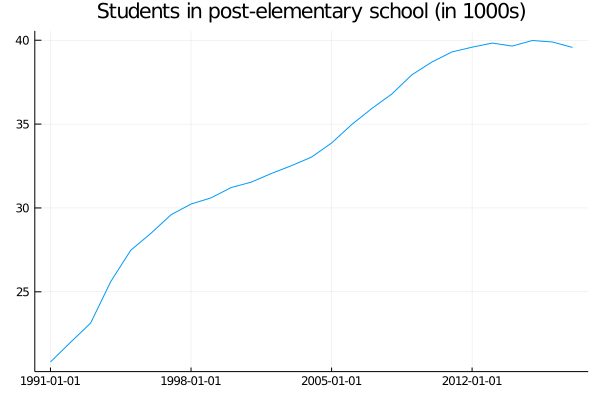

In [6]:
using Plots
Plots.plot(dr_education_revised, data_school_revised[!,2]./1000, title = "Students in post-elementary school (in 1000s)", label = "")

In [48]:
# D6111 Longueur du réseau routier (en km) 1954 - 2018
# Administration des Ponts et Chaussées
using CSV
data_infrastructure = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d6111.csv", datarow = 2, delim = ',')

,Annee,VoiriedelEtat,RoutesNationales,Autoroutes,CheminsRepris
,Int64,Int64,Int64,Int64⍰,Float64
1,1954,2129,702,missing,1393.0
2,1962,2824,865,missing,1959.0
3,1970,2831,865,7,1959.0
4,1975,2849,867,23,1959.0
5,1980,2871,868,44,1959.0
6,1985,2885,868,58,1959.0
7,1986,2892,872,58,1962.0
8,1987,2904,884,58,1962.0
9,1988,2757,865,64,1828.0


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[49]:1
└ @ Core In[49]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[49]:1
└ @ Core In[49]:1


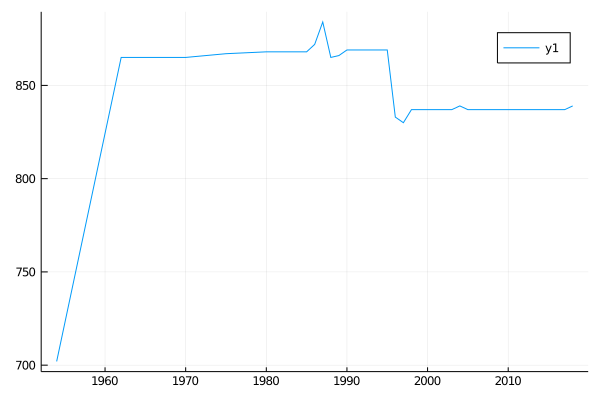

In [49]:
Plots.plot( data_infrastructure[1], data_infrastructure[3] )

In [50]:
# S&P data
using CSV
data_sp500 = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/sp500.csv", datarow = 2, delim = ',')

,Open,High,Low,Close,Volume
,Float64,Float64,Float64,Float64,Int64
1,2575.99,2578.29,2572.15,2575.26,2301425000
2,2583.21,2588.4,2574.92,2579.36,2210945000
3,2579.46,2581.11,2566.17,2579.85,2416738000
4,2581.93,2588.42,2576.77,2587.84,2052553000
5,2587.47,2593.38,2585.66,2591.13,2116417000
6,2592.11,2597.02,2584.35,2590.64,2089737000
7,2588.71,2595.47,2585.02,2594.38,2092333000
8,2584.0,2586.5,2566.33,2584.62,2233489000
9,2580.18,2583.81,2575.57,2582.3,2045162000


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[51]:3
└ @ Core In[51]:3


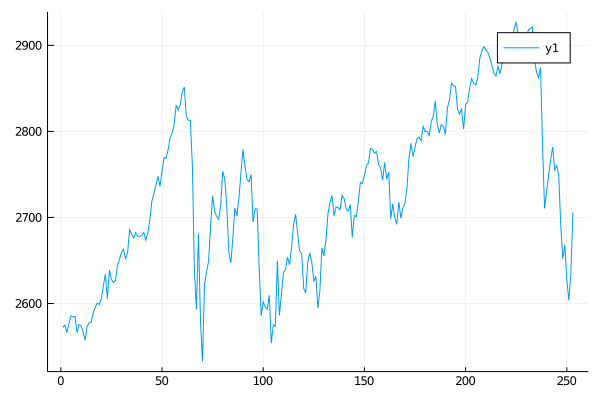

In [51]:
# S&P : october 2017 - october 2018
using Plots
Plots.plot(data_sp500[3])

In [52]:
# D7500 Taux de l'intérêt légal (en %) 1974 - 2018
# Ministère de la Justice
# http://mj.public.lu/services_citoyens/Taux_interet_legal/
# http://legilux.public.lu/eli/etat/leg/rgd/2017/12/12/a1043/jo
using CSV
data_txinteretlegal = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d7500.csv", datarow = 3, delim = ',')

,Specification,Taux applicable
,Int64,Float64
1,1974,6.0
2,1975,6.0
3,1976,6.0
4,1977,6.0
5,1978,6.0
6,1979,6.0
7,1980,6.0
8,1981,6.0
9,1982,6.0


In [53]:
using Dates
dr_txinteretlegal = Dates.Date(1974):Dates.Year(1):Dates.Date(2018)

1974-01-01:1 year:2018-01-01

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[54]:2
└ @ Core In[54]:2


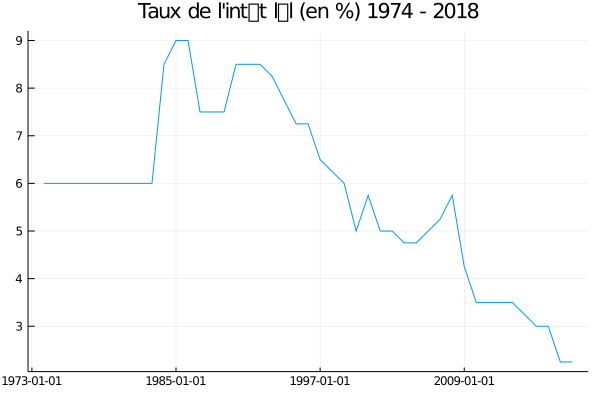

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error


In [54]:
using Plots
Plots.plot(dr_txinteretlegal, data_txinteretlegal[2], title = "Taux de l'intérêt légal (en %) 1974 - 2018", label = "")

In [55]:
# D7200 Évolution des lignes de cotation 1970 - 2017
# Bourse de Luxembourg
using CSV
data_bourseluxembourg = CSV.read("/Users/tarikz/Documents/GitHub/julia-lux/data/d7200.csv", datarow = 3, delim = ',')

,Specification,Lignes de cotation,Emprunts obligataires,+AKAAoACg-Emprunts internationaux
,Int64,Int64,Int64,Int64
1,1980,1557,1379,1312
2,1985,3635,3098,3001
3,1990,10131,7424,7320
4,1995,11874,7687,7468
5,1996,12870,8441,8029
6,1997,14478,9574,9040
7,1998,15386,10513,9964
8,1999,17051,12021,11453
9,2000,19690,13679,12991


┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[56]:2
└ @ Core In[56]:2
┌ Warning: `getindex(d

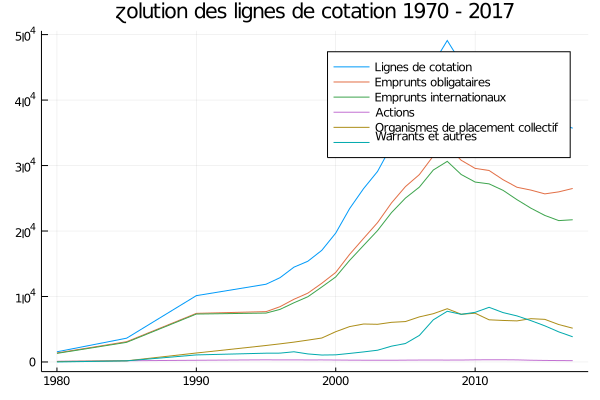

GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to unicode error
GKS: character ignored due to un

In [56]:
using Plots
Plots.plot(data_bourseluxembourg[1], [data_bourseluxembourg[2] data_bourseluxembourg[3] data_bourseluxembourg[4] data_bourseluxembourg[5] data_bourseluxembourg[6] data_bourseluxembourg[7]], title = "Évolution des lignes de cotation 1970 - 2017", label = ["Lignes de cotation" "Emprunts obligataires" "Emprunts internationaux" "Actions" "Organismes de placement collectif" "Warrants et autres
"])

In [6]:
# Inflation and CPI (Luxembourg)
using CSV
data_cpi = CSV.read("data/e5100.csv", datarow = 2, delim = ',')

,Annee,1948,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
,String⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰,Float64⍰
1,Janvier,100.0,102.94,110.85,114.62,121.52,122.52,122.82,124.2,123.91,127.36,131.12,131.12,131.44,132.5,133.43,134.39,139.41,143.78,149.69,151.99,156.82,160.57,166.4,173.06,182.32,192.74,205.79,228.35,255.32,275.48,285.85,296.48,313.34,336.08,365.29,402.55,432.37,441.04,457.07,452.09,454.95,466.25,484.8,502.42,517.09,535.31,549.44,561.16,567.51,577.01,585.21,577.301,595.34,612.62,626.81,641.29,653.88,666.74,685.78,700.94,723.79,727.41,742.27,765.56,787.69,803.81,816.12,812.8,816.81,830.63,839.98,855.37,871.5
2,Fevrier,100.62,103.98,110.09,116.57,122.49,122.26,123.12,123.63,122.98,128.06,130.41,130.61,131.0,132.03,132.82,134.95,140.49,144.25,148.57,151.5,157.64,160.73,167.46,174.23,182.87,193.64,209.65,231.7,256.54,277.29,286.5,298.03,315.91,338.03,368.81,403.74,435.09,443.77,455.16,452.78,455.29,467.51,485.36,503.11,517.09,536.89,550.87,562.09,568.05,578.73,584.98,587.955,603.12,620.4,634.48,650.05,662.34,677.2,697.18,710.77,731.97,740.36,751.13,777.68,801.1,819.12,826.19,826.47,827.57,842.05,850.57,868.35,882.5
3,Mars,100.84,103.04,110.03,118.19,122.53,121.88,122.95,122.45,123.99,127.68,129.39,130.04,130.61,131.22,132.41,134.94,139.95,143.93,148.07,150.74,157.8,161.04,167.78,175.78,183.18,194.35,211.04,233.24,257.17,278.49,287.31,298.55,317.23,340.6,369.16,404.38,434.55,446.11,452.82,452.65,456.16,469.07,485.45,504.1,519.21,538.41,550.67,562.39,569.23,577.64,585.26,588.642,604.66,622.12,635.0,651.88,662.62,678.45,698.55,713.09,737.43,739.0,755.42,783.33,803.82,819.19,826.06,827.62,827.73,842.13,851.31,869.76,876.79
4,Avril,100.78,102.51,109.13,121.56,121.48,120.91,122.03,122.15,122.79,128.01,129.76,129.91,130.87,131.27,132.5,134.7,140.19,143.92,148.26,151.08,158.14,161.4,168.49,175.92,183.54,196.18,213.77,236.12,260.79,280.17,288.93,299.29,319.04,342.74,370.42,405.64,437.2,450.01,452.3,451.52,455.94,470.63,487.44,502.13,520.0,539.59,551.16,562.39,570.91,577.76,584.0,590.93,606.95,624.06,637.46,651.48,664.45,680.85,700.66,714.93,739.27,740.91,757.6,785.64,806.47,819.93,826.33,828.03,828.31,844.28,853.22,871.33,NaN
5,Mai,100.62,102.62,109.19,120.95,121.52,120.88,122.04,122.01,122.24,128.13,129.83,129.48,130.72,131.34,132.58,137.23,140.26,145.65,148.97,151.25,157.99,162.1,169.37,177.21,184.25,198.59,215.7,237.57,262.39,281.22,289.38,301.0,321.05,345.34,375.54,407.69,439.16,450.57,452.35,450.92,456.46,472.32,488.56,504.59,522.56,540.73,552.25,563.27,571.35,578.45,585.95,592.59,607.7,627.56,639.34,651.71,665.88,681.83,703.12,716.16,744.11,741.59,759.03,786.05,805.32,818.17,826.6,831.5,830.96,844.94,856.11,873.32,NaN
6,Juin,100.93,102.82,109.68,121.02,122.06,121.31,123.3,122.21,123.36,129.23,130.38,130.72,131.94,132.26,133.91,138.08,141.4,146.58,149.93,152.61,158.14,161.91,169.84,177.61,186.31,198.84,216.22,239.28,262.71,282.66,290.2,302.33,321.79,348.88,379.83,408.83,436.41,451.52,452.04,450.35,457.33,473.66,488.35,505.38,523.59,541.07,552.54,564.06,571.1,578.9,585.66,592.3,611.65,629.44,640.32,651.71,667.6,682.

In [7]:
iLine, iColumn = size(data_cpi)

data_temp = data_cpi[2]

for i in 3:1:iColumn
            data_temp = vcat( data_temp, data_cpi[i] )
       end

# vcat( data_cpi[2], data_cpi[3] )

In [8]:
using Dates
dr_cpi_long = Date(1948,1,29):Dates.Month(1):Date(2020,12,29)


1948-01-29:1 month:2020-12-29

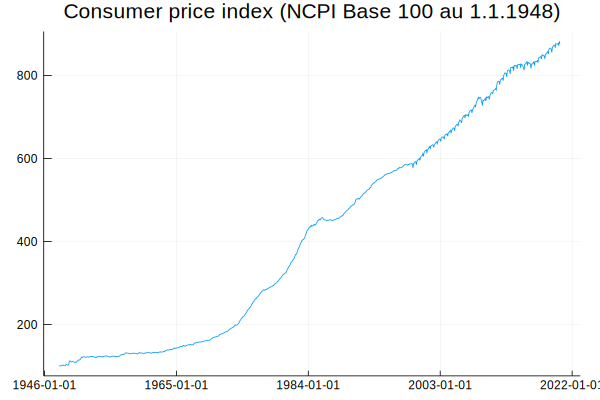

In [10]:
using Plots
Plots.plot( dr_cpi_long, data_temp, title="Consumer price index (NCPI Base 100 au 1.1.1948)" , label="" )

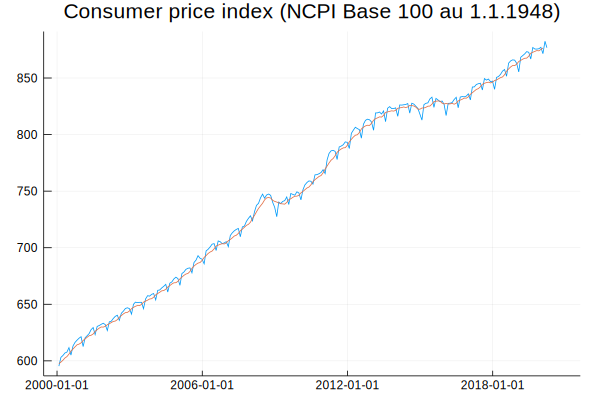

In [12]:
using Dates, CSV, Plots, ImageFiltering, OffsetArrays

data_cpi = CSV.read("data/e5100.csv", datarow = 2, delim = ',')

dr_cpi_short = Date(2000,1,29):Dates.Month(1):Date(2020,12,29)

iLine, iColumn = size(data_cpi)

data_temp_short = data_cpi[54]

for i in 55:1:iColumn
            data_temp_short = vcat( data_temp_short, data_cpi[i] )
       end


kernel = OffsetArray(fill(1/8, 8), -5:2)  # moving average of 5 previous, current, and 2 ahead

iT = size(data_temp_short) # adapt to length of series
v_export = data_temp_short
[v_export imfilter(v_export, kernel)]

Plots.plot( dr_cpi_short, [v_export imfilter(v_export, kernel)], title="Consumer price index (NCPI Base 100 au 1.1.1948)", label = "" )



#Plots.plot( dr_cpi_short, data_temp_short, title="Consumer price index (NCPI Base 100 au 1.1.1948)" , label="" )

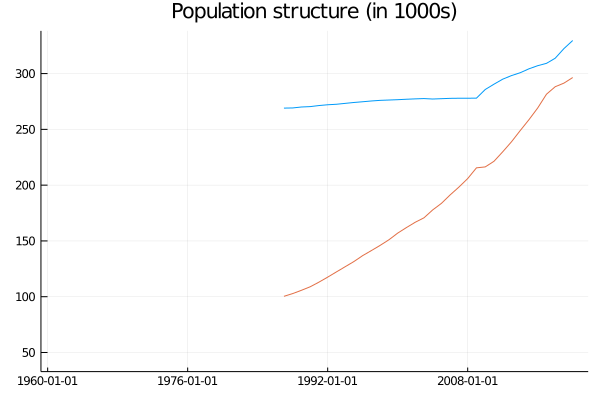

In [9]:
# Population - Luxembourg
using Dates, CSV, Plots, ImageFiltering, OffsetArrays
## Read data
data_population = CSV.read("data/b1115.csv", datarow = 2, delim = ',')
## Constructing dates
dr_population = Dates.Date(1961):Dates.Year(1):Dates.Date(2020)
## Diagram
Plots.plot( dr_population, [data_population[!, 3]./1000 data_population[!,4]./1000 ], title="Population structure (in 1000s)", label = "" )
# Note: Issues with numbers